In [0]:
#˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚ TASK 2 ˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚#

In [0]:
import mlflow
mlflow.pyspark.ml.autolog()
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710945103000),
 FileInfo(path='dbfs:/FileStore/tables/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1709905302000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023', name='clinicaltrial_2023', size=292436366, modificationTime=1712312605000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv/', name='clinicaltrial_2023.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.zip', name='clinicaltrial_2023.zip', size=57166668, modificationTime=1709905902000),
 FileInfo(path='dbfs:/FileStore/tables/clinica

In [0]:
Spark = SparkSession.builder \
    .appName("Steam Recommender") \
    .getOrCreate()

In [0]:
Steam = spark.read.csv("/FileStore/tables/steam_200k.csv", header=False, inferSchema=True)
Steam = Steam.toDF("ID", "GameName", "Action", "Hours")
Steam.show(5)

+---------+--------------------+--------+-----+
|       ID|            GameName|  Action|Hours|
+---------+--------------------+--------+-----+
|151603712|The Elder Scrolls...|purchase|  1.0|
|151603712|The Elder Scrolls...|    play|273.0|
|151603712|           Fallout 4|purchase|  1.0|
|151603712|           Fallout 4|    play| 87.0|
|151603712|               Spore|purchase|  1.0|
+---------+--------------------+--------+-----+
only showing top 5 rows



In [0]:
Steam.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- GameName: string (nullable = true)
 |-- Action: string (nullable = true)
 |-- Hours: double (nullable = true)



In [0]:
Steam.display()

ID,GameName,Action,Hours
151603712,The Elder Scrolls V Skyrim,purchase,1.0
151603712,The Elder Scrolls V Skyrim,play,273.0
151603712,Fallout 4,purchase,1.0
151603712,Fallout 4,play,87.0
151603712,Spore,purchase,1.0
151603712,Spore,play,14.9
151603712,Fallout New Vegas,purchase,1.0
151603712,Fallout New Vegas,play,12.1
151603712,Left 4 Dead 2,purchase,1.0
151603712,Left 4 Dead 2,play,8.9


In [0]:
MissingValues = Steam.filter(Steam.ID.isNull() | Steam.GameName.isNull() | Steam.Action.isNull() | Steam.Hours.isNull())
MissingCount = MissingValues.count()
print("Number Of Missing Values: ", MissingCount)

Number Of Missing Values:  0


In [0]:
Spark = SparkSession.builder \
    .appName("Add Game ID") \
    .getOrCreate()

In [0]:
GameIDs = Steam.select("GameName").distinct().withColumn("GameId", monotonically_increasing_id())
SteamNew = Steam.join(GameIDs, on="GameName", how="left").drop("GameName")
SteamNew.show()

+---------+--------+-----+------+
|       ID|  Action|Hours|GameId|
+---------+--------+-----+------+
|151603712|purchase|  1.0|  2609|
|151603712|    play|273.0|  2609|
|151603712|purchase|  1.0|   410|
|151603712|    play| 87.0|   410|
|151603712|purchase|  1.0|  3868|
|151603712|    play| 14.9|  3868|
|151603712|purchase|  1.0|  3820|
|151603712|    play| 12.1|  3820|
|151603712|purchase|  1.0|    69|
|151603712|    play|  8.9|    69|
|151603712|purchase|  1.0|  3340|
|151603712|    play|  8.5|  3340|
|151603712|purchase|  1.0|  1562|
|151603712|    play|  8.1|  1562|
|151603712|purchase|  1.0|  4116|
|151603712|    play|  7.5|  4116|
|151603712|purchase|  1.0|  1992|
|151603712|    play|  3.3|  1992|
|151603712|purchase|  1.0|  3893|
|151603712|    play|  2.8|  3893|
+---------+--------+-----+------+
only showing top 20 rows



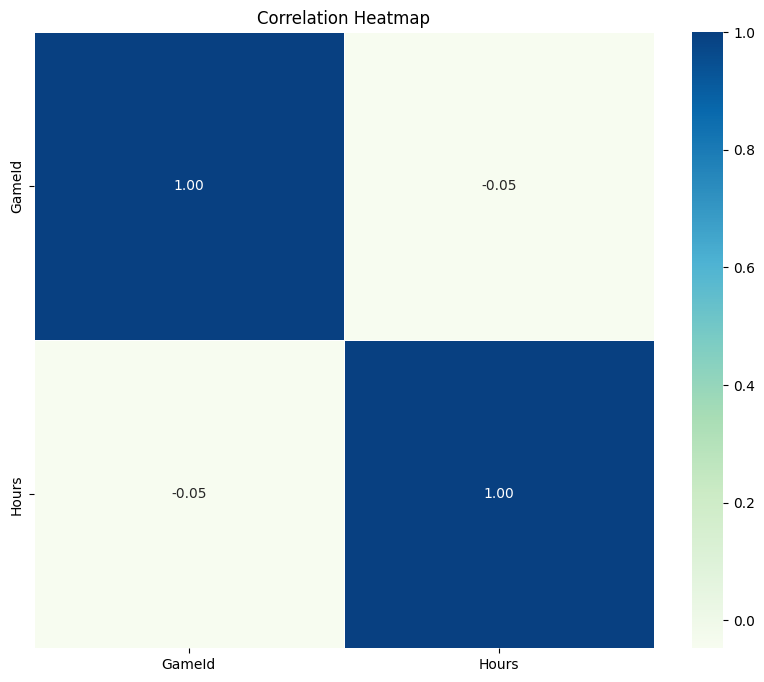

In [0]:
CorrelationMatrix = SteamNew.select("GameId", "Hours").toPandas().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(CorrelationMatrix, annot=True, cmap="GnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [0]:
Purchase = SteamNew[SteamNew["Action"] == "purchase"]
PurchaseCount = Purchase.count()
print("Purchased:" , PurchaseCount)
Purchase.show()

Purchased: 129511
+---------+--------+-----+------+
|       ID|  Action|Hours|GameId|
+---------+--------+-----+------+
|151603712|purchase|  1.0|  2609|
|151603712|purchase|  1.0|   410|
|151603712|purchase|  1.0|  3868|
|151603712|purchase|  1.0|  3820|
|151603712|purchase|  1.0|    69|
|151603712|purchase|  1.0|  3340|
|151603712|purchase|  1.0|  1562|
|151603712|purchase|  1.0|  4116|
|151603712|purchase|  1.0|  1992|
|151603712|purchase|  1.0|  3893|
|151603712|purchase|  1.0|  1754|
|151603712|purchase|  1.0|  3341|
|151603712|purchase|  1.0|  3540|
|151603712|purchase|  1.0|  2392|
|151603712|purchase|  1.0|   653|
|151603712|purchase|  1.0|  4023|
|151603712|purchase|  1.0|  3273|
|151603712|purchase|  1.0|  3517|
|151603712|purchase|  1.0|  2119|
|151603712|purchase|  1.0|  3541|
+---------+--------+-----+------+
only showing top 20 rows



In [0]:
Play = SteamNew[SteamNew["Action"] == "play"]
PlayCount = Play.count()
print("Played:" , PlayCount)
Play.show()

Played: 70489
+---------+------+-----+------+
|       ID|Action|Hours|GameId|
+---------+------+-----+------+
|151603712|  play|273.0|  2609|
|151603712|  play| 87.0|   410|
|151603712|  play| 14.9|  3868|
|151603712|  play| 12.1|  3820|
|151603712|  play|  8.9|    69|
|151603712|  play|  8.5|  3340|
|151603712|  play|  8.1|  1562|
|151603712|  play|  7.5|  4116|
|151603712|  play|  3.3|  1992|
|151603712|  play|  2.8|  3893|
|151603712|  play|  2.5|  1754|
|151603712|  play|  2.0|  3341|
|151603712|  play|  1.4|  3540|
|151603712|  play|  1.3|  2392|
|151603712|  play|  1.3|   653|
|151603712|  play|  0.8|  4023|
|151603712|  play|  0.8|  3273|
|151603712|  play|  0.6|  3517|
|151603712|  play|  0.5|  2119|
|151603712|  play|  0.5|  3541|
+---------+------+-----+------+
only showing top 20 rows



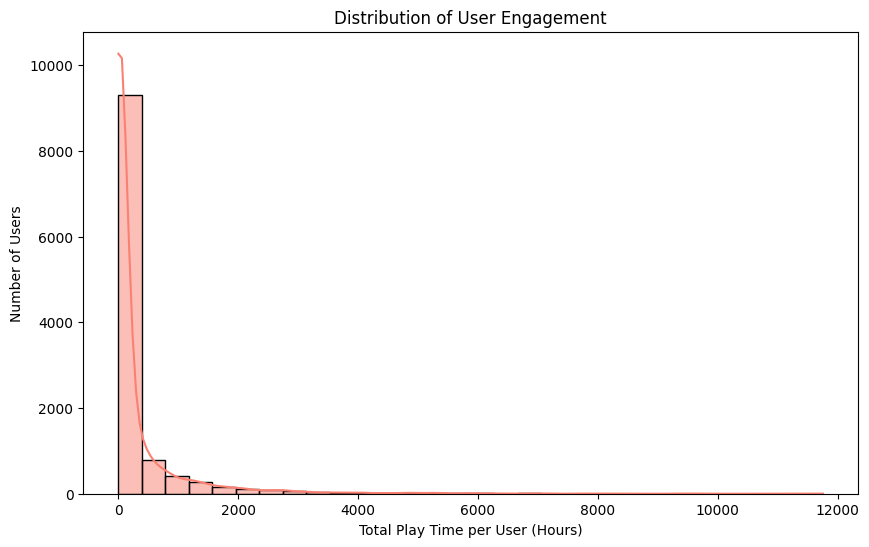

In [0]:
PlayTime = Play.groupBy("ID").sum("Hours").toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(PlayTime, x="sum(Hours)", bins=30, kde=True, color="salmon")
plt.xlabel("Total Play Time per User (Hours)")
plt.ylabel("Number of Users")
plt.title("Distribution of User Engagement")
plt.show()


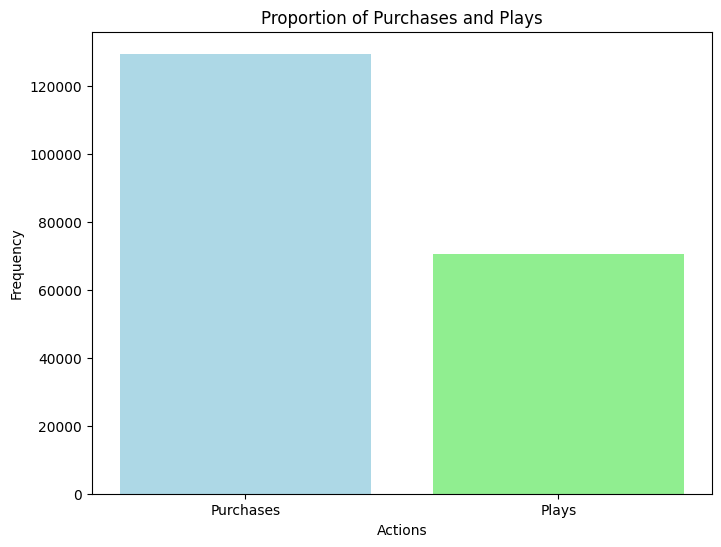

In [0]:
Labels = ["Purchases", "Plays"]
Sizes = [PurchaseCount, PlayCount]
Colors = ["lightblue", "lightgreen"]

plt.figure(figsize=(8, 6))
plt.bar(Labels, Sizes, color=Colors)
plt.xlabel("Actions")
plt.ylabel("Frequency")
plt.title("Proportion of Purchases and Plays")
plt.show()

In [0]:
PurchaseCount = Purchase.select("ID").distinct().count()

NonPlay_Purchase = Purchase.join(Play.select("ID"), on="ID", how="left_anti")
NonPlay_PurchaseCount = NonPlay_Purchase.select("ID").distinct().count()

print("Purchased (including play actions):", PurchaseCount)
print("Purchased (excluding play actions):", NonPlay_PurchaseCount)

NonPlay_Purchase.show()

Purchased (including play actions): 12393
Purchased (excluding play actions): 1043
+---------+--------+-----+------+
|       ID|  Action|Hours|GameId|
+---------+--------+-----+------+
|234941318|purchase|  1.0|  2418|
|256193015|purchase|  1.0|  2483|
| 30007387|purchase|  1.0|   442|
| 30007387|purchase|  1.0|  4007|
|159538705|purchase|  1.0|    69|
|299889828|purchase|  1.0|   466|
|299889828|purchase|  1.0|  1181|
|197902002|purchase|  1.0|  3438|
|211277578|purchase|  1.0|  1998|
|214167822|purchase|  1.0|  1656|
|196354657|purchase|  1.0|  1896|
| 65758675|purchase|  1.0|  3433|
|239921853|purchase|  1.0|    20|
|239921853|purchase|  1.0|   675|
|239921853|purchase|  1.0|  1941|
|239921853|purchase|  1.0|  2416|
|239921853|purchase|  1.0|   272|
|239921853|purchase|  1.0|  2748|
|208164637|purchase|  1.0|  2219|
|208164637|purchase|  1.0|  3548|
+---------+--------+-----+------+
only showing top 20 rows



In [0]:
(training,test) = Purchase.randomSplit([0.8,0.2], seed=100)
training=training.unionAll(Purchase)

In [0]:
Als = ALS(maxIter=10, regParam=0.01, userCol="ID", itemCol="GameId", ratingCol="Hours", seed=100)
Model = Als.fit(training)

2024/04/30 12:44:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '092225d557404ef3b63477ffb97e67f9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/04/30 12:44:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.10/site-packages/mlflow/data/spark_dataset.py:159: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missi

In [0]:
Predictions = Model.transform(test).dropna()
Predictions.show()

+------+--------+-----+------+----------+
|    ID|  Action|Hours|GameId|prediction|
+------+--------+-----+------+----------+
|  5250|purchase|  1.0|   442|  0.989738|
|  5250|purchase|  1.0|  1996|0.98409677|
|  5250|purchase|  1.0|  3458| 0.9952462|
|  5250|purchase|  1.0|  4303| 0.9937242|
| 76767|purchase|  1.0|   487|  0.991144|
| 76767|purchase|  1.0|  1017|0.98885125|
| 76767|purchase|  1.0|  1635| 0.9855414|
| 76767|purchase|  1.0|  1950|0.99461216|
| 76767|purchase|  1.0|  1971|0.97904557|
| 76767|purchase|  1.0|  1996|  0.979151|
| 76767|purchase|  1.0|  2307| 0.9860165|
| 76767|purchase|  1.0|  2332|   0.99217|
| 76767|purchase|  1.0|  3689| 0.9785608|
|103360|purchase|  1.0|   628| 0.9859344|
|103360|purchase|  1.0|  1527| 0.9903169|
|103360|purchase|  1.0|  3689| 0.9854944|
|181212|purchase|  1.0|  1527|0.98858166|
|181212|purchase|  1.0|  4007| 0.9907006|
|298950|purchase|  1.0|    44| 0.9804477|
|298950|purchase|  1.0|   268|0.98411065|
+------+--------+-----+------+----

In [0]:
Evaluator = RegressionEvaluator(metricName="rmse", labelCol="Hours", predictionCol="prediction")

RMSE = Evaluator.evaluate(Predictions)
print("Root Mean Squared Error (RMSE) = " + str(RMSE))

Root Mean Squared Error (RMSE) = 0.0145822316593147


In [0]:
UserRecs = Model.recommendForAllUsers(5)

In [0]:
print("Specific User Recommendations:")
UserRecs.show(5, truncate=False)

Specific User Recommendations:
+------+-----------------------------------------------------------------------------------------------+
|ID    |recommendations                                                                                |
+------+-----------------------------------------------------------------------------------------------+
|76767 |[{1713, 1.0516033}, {2905, 1.0470476}, {4677, 1.0243486}, {4660, 1.012917}, {311, 1.0107081}]  |
|144736|[{1713, 1.0587051}, {2905, 1.0436513}, {4677, 1.0289222}, {4660, 1.0228708}, {4103, 1.0174247}]|
|229911|[{1713, 1.0553768}, {2905, 1.0449419}, {4677, 1.0269659}, {4660, 1.0182285}, {4103, 1.013547}] |
|835015|[{1713, 1.0584537}, {2905, 1.043892}, {4677, 1.0287001}, {4660, 1.0224345}, {4103, 1.0171169}] |
|948368|[{1713, 1.0560124}, {2905, 1.0446193}, {4677, 1.026872}, {4660, 1.0188572}, {4103, 1.0142084}] |
+------+-----------------------------------------------------------------------------------------------+
only showing top 5 rows


In [0]:
ID=298950
UserRecs.filter(UserRecs.ID == ID).show(truncate=False)

+------+---------------------------------------------------------------------------------------------+
|ID    |recommendations                                                                              |
+------+---------------------------------------------------------------------------------------------+
|298950|[{2905, 1.0514553}, {1713, 1.0486517}, {4677, 1.0219896}, {311, 1.0094858}, {4660, 1.005899}]|
+------+---------------------------------------------------------------------------------------------+



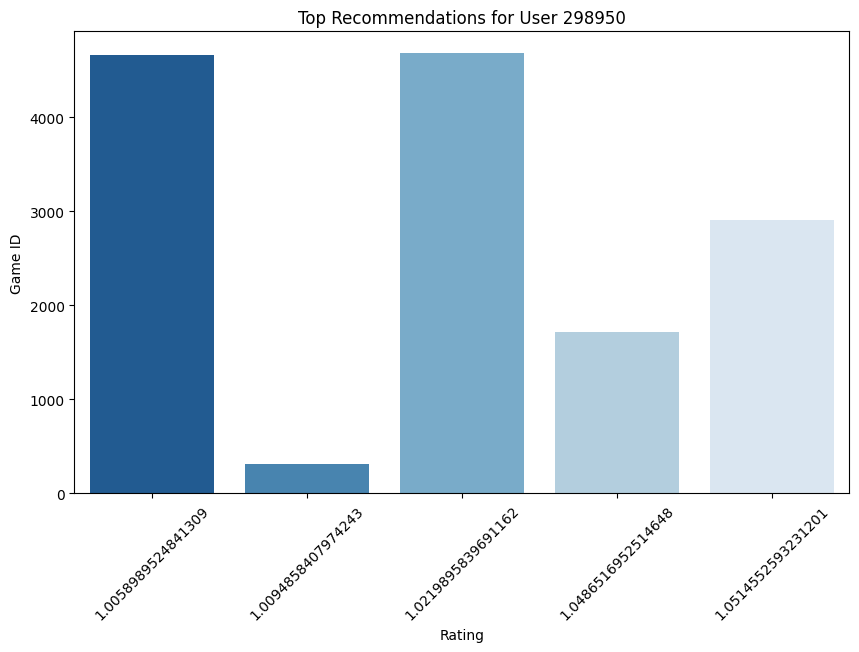

In [0]:
Recommendations = UserRecs.filter(UserRecs.ID == ID).select("recommendations").collect()[0][0]
RecommendationsDF = spark.createDataFrame(Recommendations).toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(x="rating", y="GameId", data=RecommendationsDF, palette="Blues_r")
plt.xlabel("Rating")
plt.ylabel("Game ID")
plt.title("Top Recommendations for User " + str(ID))
plt.xticks(rotation=45)
plt.show()

In [0]:
#˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚ EXTRA ANALYSIS ˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚•˚#

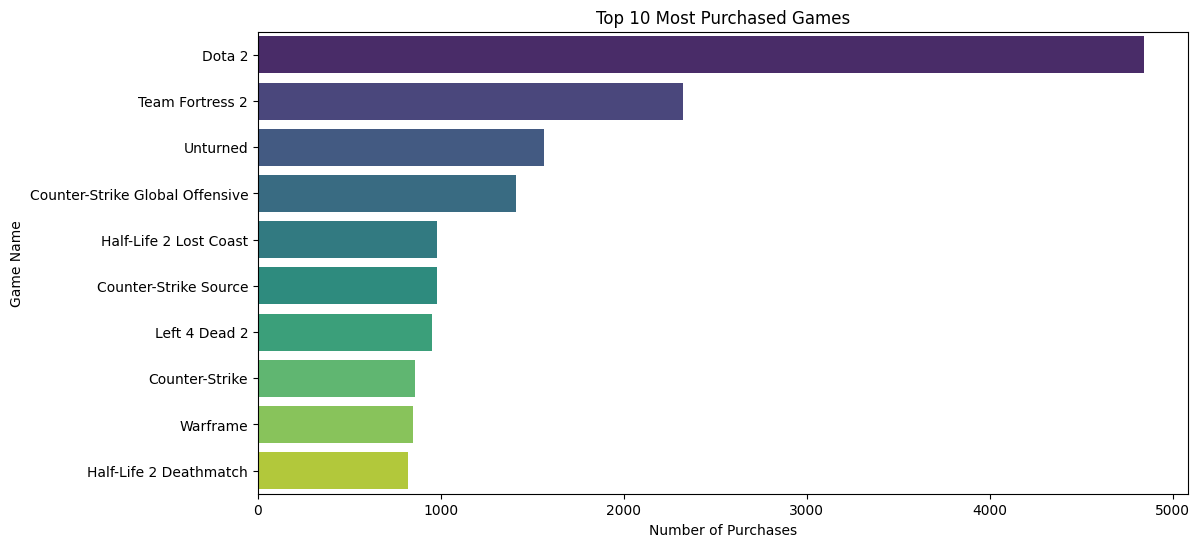

In [0]:
# Most Purchased Trend: Plotting the top 10 most purchased games

MostPurchased = Purchase.groupBy("GameId").count().orderBy("count", ascending=False).limit(10)
MostPurchasedGames = MostPurchased.join(GameIDs, on="GameId", how="left").select("GameName", "count")

plt.figure(figsize=(12, 6))
sns.barplot(x="count", y="GameName", data=MostPurchasedGames.toPandas(), palette="viridis")
plt.xlabel("Number of Purchases")
plt.ylabel("Game Name")
plt.title("Top 10 Most Purchased Games")
plt.show()

In [0]:
# Total Play Time: Counting the total hours of gaming for each game

TotalPlayTime = Steam.filter(Steam["Action"] == "play").groupBy("GameName").sum("Hours")
TotalPlayTime = TotalPlayTime.withColumnRenamed("sum(Hours)", "TotalPlayTime")
TotalPlayTime = TotalPlayTime.orderBy("TotalPlayTime", ascending=False)
TotalPlayTime.show(10)

+--------------------+------------------+
|            GameName|     TotalPlayTime|
+--------------------+------------------+
|              Dota 2| 981684.5999999999|
|Counter-Strike Gl...| 322771.6000000001|
|     Team Fortress 2|173673.30000000005|
|      Counter-Strike|134261.09999999998|
|Sid Meier's Civil...| 99821.30000000002|
|Counter-Strike So...| 96075.50000000003|
|The Elder Scrolls...|           70889.3|
|         Garry's Mod|           49725.3|
|Call of Duty Mode...|42009.899999999994|
|       Left 4 Dead 2|33596.700000000004|
+--------------------+------------------+
only showing top 10 rows



In [0]:
# Hyperparameter Tuning: Tuning the parameters for gaining the best model

from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import TrainValidationSplit

In [0]:
Als = ALS(userCol="ID", itemCol="GameId", ratingCol="Hours", seed=100)
Parameters = ParamGridBuilder()\
    .addGrid(Als.regParam ,[0.001, 0.005, 0.01, 0.05, 0.1])\
    .addGrid(Als.rank,[5,10,15])\
    .build()

In [0]:
TVS = TrainValidationSplit()\
    .setSeed(100)\
    .setTrainRatio(0.75)\
    .setEstimatorParamMaps(Parameters)\
    .setEstimator(Als)\
    .setEvaluator(Evaluator)
    
GridSearchModel = TVS.fit(training)

2024/04/30 13:22:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f2c4c589adeb42d99c34c2e8e5f8f84a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/04/30 13:22:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.10/site-packages/mlflow/data/spark_dataset.py:159: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missi

In [0]:
BestModel = GridSearchModel.bestModel
print("Parameters for the best model:")
print("Rank Parameter: " + str(BestModel.rank))
print("RegParam Parameter: " + str(BestModel._java_obj.parent().getRegParam()))

Parameters for the best model:
Rank Parameter: 5
RegParam Parameter: 0.001
